In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import glob
import json
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
file=glob.glob('/content/drive/My Drive/Digital_Music_5.json')
review=[]
with open(file[0]) as data_file:
    data=data_file.read()
    for i in data.split('\n'):
        review.append(i)
        
# Making a list of Tuples containg all the data of json files.
reviewDataframe=[]
for x in review:
    try:
        jdata=json.loads(x)
        reviewDataframe.append((jdata['reviewerID'],jdata['asin'],jdata['reviewText'],jdata['overall'])) 
    except:
        pass        
    
# Creating a dataframe using the list of Tuples got in the previous step.    
data=pd.DataFrame(reviewDataframe,columns=['user_id','item_id','reviews','Ratings']) 

In [ ]:
# file=glob.glob('/content/drive/My Drive/dataset/music/Digital_Music_5.json')
# review=[]
# with open(file[0]) as data_file:
#     data=data_file.read()
#     for i in data.split('\n'):
#         review.append(i)
        
# # Making a list of Tuples containg all the data of json files.
# reviewDataframe=[]
# for x in review:
#     try:
#         jdata=json.loads(x)
#         reviewDataframe.append((jdata['reviewerID'],jdata['asin'],jdata['reviewText'],jdata['overall'])) 
#     except:
#         pass        
    
# # Creating a dataframe using the list of Tuples got in the previous step.    
# data=pd.DataFrame(reviewDataframe,columns=['user_id','item_id','reviews','Ratings'])    
# data.to_csv('/content/drive/My Drive/dataset/music/music_Narre.csv',index=False)

In [ ]:
# data=pd.read_csv('/content/drive/My Drive/dataset/music/music_Narre.csv')
# data.head()

In [ ]:
# modify ids from 0 to num_id
data=pd.read_csv("/content/drive/My Drive/dataset/music/music_title.csv")
data=data.dropna()

import os
TPS_DIR = '/content/drive/My Drive/dataset/music/title'

def get_count(tp, id):
    playcount_groupbyid = tp[[id, 'Ratings']].groupby(id, as_index=False)
    count = playcount_groupbyid.size()
    return count
  
  
usercount, itemcount = get_count(data, 'user_id'), get_count(data, 'item_id')
unique_uid = usercount.index
unique_sid = itemcount.index
item2id = dict((sid, i) for (i, sid) in enumerate(unique_sid)) # be userha shomare mide az 0 ta akharin tedade unique
user2id = dict((uid, i) for (i, uid) in enumerate(unique_uid))


def numerize(tp):
    uid = list(map(lambda x: user2id[x], tp['user_id']))
    sid = list(map(lambda x: item2id[x], tp['item_id']))

    tp['user_id'] = uid
    tp['item_id'] = sid
    return tp

data=numerize(data)

In [ ]:
data=data[['user_id','item_id','reviews','Ratings','title']]

In [14]:
data=pd.read_csv('/content/drive/My Drive/dataset/music/analysis/music_processed.csv')
data['reviews'].fillna('nothing')
data.shape


(51764, 4)

In [15]:
data=data.sample(25000)

In [16]:
data.head()

,user_id,item_id,Ratings,reviews
35876,4553,2279,5.0,in pron opinion cd like this somewhat sell pro...
23512,4500,1639,2.0,with the exception of every woman in the world...
42509,4200,2629,2.0,after read just handful of the over review pro...
13505,679,877,4.0,this album be good but not the good of pron pr...
14091,4409,924,4.0,have be blow away by sundown pron be eager to ...


In [18]:
# تقسیم بندی مجموعه داده به train , test valid 
# be cause we don't have any x,y

# data=pd.read_csv('/content/drive/My Drive/dataset/music/analysis/music_processed.csv')

# tp_rating=data[['user_id','item_id','Ratings']]

tp_rating=data
n_ratings = tp_rating.shape[0]
test = np.random.choice(n_ratings, size=int(0.20 * n_ratings), replace=False)
test_idx = np.zeros(n_ratings, dtype=bool)
test_idx[test] = True

tp_1 = tp_rating[test_idx]
tp_train= tp_rating[~test_idx]

data2=data[test_idx]  #
data=data[~test_idx]  #train data


n_ratings = tp_1.shape[0]
test = np.random.choice(n_ratings, size=int(0.50 * n_ratings), replace=False)

test_idx = np.zeros(n_ratings, dtype=bool)
test_idx[test] = True

tp_test = tp_1[test_idx]
tp_valid = tp_1[~test_idx]

In [19]:
import os
TPS_DIR = '/content/drive/My Drive/dataset/music/project'
tp_train.to_csv(os.path.join(TPS_DIR, 'music_train.csv'), index=False,header=None)
tp_valid.to_csv(os.path.join(TPS_DIR, 'music_valid.csv'), index=False,header=None)
tp_test.to_csv(os.path.join(TPS_DIR, 'music_test.csv'), index=False,header=None)

In [ ]:
data=data[['user_id','item_id','Ratings','reviews']]
data.shape

(4000, 4)

In [ ]:
# data=pd.read_csv('/content/drive/My Drive/dataset/music/analysis/music_2000.csv')
import spacy
import re

nlp = spacy.load('en')
from nltk.tokenize.treebank import TreebankWordDetokenizer
def clean_str(strings):
    
    strings = re.sub(r"\'s", " \'s", strings)
    strings = re.sub(r"\'ve", " have", strings)
    strings = re.sub(r"\'m", " am", strings)
    stringss = re.sub(r"n\'t", " not", strings)
    stringss = re.sub(r"\'re", " are", strings)
    stringss = re.sub(r"\'d", " would", strings)
    stringss = re.sub(r"\'ll", " will", strings)
    strings= re.sub(r'\d+', '', strings)
    strings = strings.strip()
    # strings = string.translate(strings.maketrans(','))
    strings = re.sub(r"[\*\"“”\n\\…\+\-\/\=\(\)‘•:\[\]\|’;]", " ", str(strings))
    strings = re.sub(r"[ ]+", " ", strings)
    strings = re.sub(r"\!+", "!", strings)
    strings = re.sub(r"\,+", ",", strings)
    strings = re.sub(r"\?+", "?", strings)
    strings = re.sub(r"a+", "a", strings)
    strings = re.sub(r"bb+", "b", strings)
    strings = re.sub(r"cc+", "c", strings)
    strings = re.sub(r"zz+", "z", strings)
    strings = re.sub(r'"', '', strings)
    strings = re.sub(r'\'', '', strings)
    strings = re.sub(r"[^A-Za-z]", " ", strings)
    strings = re.sub(r'((\w)\2{3,})', r'\1', strings)
    strings = re.sub(' +', ' ',strings)


    return strings.strip().lower()

def stemming(strings):
    a=[]
    doc = nlp(strings)
    for token in doc:
      a.append(token.lemma_)
    a=TreebankWordDetokenizer().detokenize(a)
    return a

data['reviews']=data['reviews'].apply(stemming)
data['reviews']=data['reviews'].apply(clean_str)

data.to_csv(os.path.join(TPS_DIR, 'music_processed.csv'), index=False)

In [ ]:
# d1=pd.read_csv('/content/drive/My Drive/dataset/music/analysis/music_10000_processed.csv')
# d2=pd.read_csv('/content/drive/My Drive/dataset/music/analysis/music_20000_processed.csv')
# d3=pd.read_csv('/content/drive/My Drive/dataset/music/analysis/music_30000_processed.csv')
# d4=pd.read_csv('/content/drive/My Drive/dataset/music/analysis/music_40000_processed.csv')
# d5=pd.read_csv('/content/drive/My Drive/dataset/music/analysis/music_50000_processed.csv')
# d6=pd.read_csv('/content/drive/My Drive/dataset/music/analysis/music_60000_processed.csv')


# data=pd.concat([d1, d2,d3,d4,d5,d6])
# data.shape

(51764, 4)

In [ ]:
tmp1=pd.read_csv('/content/drive/My Drive/dataset/music/title/music_test.csv')
tmp2=pd.read_csv('/content/drive/My Drive/dataset/music/title/music_valid.csv')
data2=pd.concat([tmp1,tmp2])

In [20]:
# getting item reviews and user

#harchizi ke tu data hast tu userReview  ham hast yani age ye user_id tu user_Review nist pas tu in data ham nist, in data az un 5 ta miyad
user_reviews={}
item_reviews={}
user_rid={}
item_rid={}
for i in data.values:
    if i[0] in user_reviews:
        user_reviews[i[0]].append(i[3])
        user_rid[i[0]].append(i[1])
    else:
        user_rid[i[0]]=[i[1]]
        user_reviews[i[0]]=[i[3]]
    if i[1] in item_reviews:
        item_reviews[i[1]].append(i[3])
        item_rid[i[1]].append(i[0])
    else:
        item_reviews[i[1]] = [i[3]]
        item_rid[i[1]]=[i[0]]

# for test and valid data
for i in data2.values:
    if i[0] in user_reviews:
        l=1
    else:
        user_rid[i[0]]=[0]
        user_reviews[i[0]]=['0']
    if i[1] in item_reviews:
        l=1
    else:
        item_reviews[i[1]] = [0]
        item_rid[i[1]]=['0']


In [22]:
import pickle
pickle.dump(user_reviews, open(os.path.join(TPS_DIR, 'user_review'), 'wb'))
pickle.dump(item_reviews, open(os.path.join(TPS_DIR, 'item_review'), 'wb'))
pickle.dump(user_rid, open(os.path.join(TPS_DIR, 'user_rid'), 'wb'))
pickle.dump(item_rid, open(os.path.join(TPS_DIR, 'item_rid'), 'wb'))

In [23]:
import numpy as np
import itertools
from collections import Counter
import sys
import tensorflow as tf
import csv
import pickle
import os
import pandas as pd

TPS_DIR = '/content/drive/My Drive/dataset/music/project'

# valid_data="/content/drive/My Drive/dataset/toys_and_games/toys_valid.csv"
# test_data= "/content/drive/My Drive/dataset/toys_and_games/toys_test.csv"
# train_data= "/content/drive/My Drive/dataset/toys_and_games/toys_train.csv"
# user_review= "/content/drive/My Drive/dataset/toys_and_games/user_review"
# item_review= "/content/drive/My Drive/dataset/toys_and_games/item_review"
# user_review_id= "/content/drive/My Drive/dataset/toys_and_games/user_rid"
# item_review_id= "/content/drive/My Drive/dataset/toys_and_games/item_rid"


valid_data=TPS_DIR+"/music_valid.csv"
test_data= TPS_DIR+"/music_test.csv"
train_data= TPS_DIR+"/music_train.csv"
user_review= TPS_DIR+"/user_review"
item_review=TPS_DIR+"/item_review"
user_review_id=TPS_DIR +"/user_rid"
item_review_id= TPS_DIR+"/item_rid"


In [24]:
np.random.seed(2017)
def load_data_and_labels(train_data, valid_data, user_review, item_review, user_rid, item_rid):
    # """
    # Loads MR polarity data from files, splits the data into words and generates labels.
    # Returns split sentences and labels.
    # """
    # Load data from files
        f_train = open(train_data, "r").readlines()
        f_valid = open(valid_data, "r").readlines()
        user_reviews = pickle.load(open(user_review,"rb"))
        user_rids = pickle.load(open(user_review_id,"rb"))
        item_reviews = pickle.load(open(item_review,"rb"))
        item_rids = pickle.load(open(item_review_id,"rb"))

        # reid_user_train = []
        # reid_item_train = []
        uid_train = []
        iid_train = []
        y_train = []
        u_text = {}
        u_rid = {}
        i_text = {}
        i_rid = {}
        i = 0
        # print(user_reviews[4190])
        # user_reviews[1628]='nothing'
        for line in f_train:
            i = i + 1
            line = line.split(',')
            # print(line)
            uid_train.append(int(line[0]))
            iid_train.append(int(line[1]))
            
            if int(line[0]) not in u_text:
                # reid_user_train.append(u_rid[int(line[0])])
            # else:
                u_text[int(line[0])] = []
                for s in user_reviews[int(line[0])]:
                    u_text[int(line[0])].append(s)
                u_rid[int(line[0])] = []
                for s in user_rids[int(line[0])]:
                    u_rid[int(line[0])].append(int(s))
                # reid_user_train.append(u_rid[int(line[0])])

            if int(line[1]) not in i_text:
                # reid_item_train.append(i_rid[int(line[1])])  #####write here
            # else:
                i_text[int(line[1])] = []
                for s in item_reviews[int(line[1])]:
                    i_text[int(line[1])].append(s)
                i_rid[int(line[1])] = []
                for s in item_rids[int(line[1])]:
                    i_rid[int(line[1])].append(int(s))
                # reid_item_train.append(i_rid[int(line[1])])
            y_train.append(float(line[2]))
        #   print(len(j) )
        # print ("valid")
        # reid_user_valid = []
        # reid_item_valid = []

        uid_valid = []
        iid_valid = []
        y_valid = []
        
        for line in f_valid:     #valid ro kamel kharab kardam
            line = line.split(',')
            uid_valid.append(int(line[0]))
            iid_valid.append(int(line[1]))
            if int(line[0]) not in u_text:    #agar in id tooye f_train ham boode
                
                # print(int(line[0]))
                # reid_user_valid.append(u_rid[int(line[0])])
            # else:  # agar in id faghat tooye valid hast faghat pad bezar!! chera????
                
                u_text[int(line[0])] = ['<PAD/>']        
                u_rid[int(line[0])] = [int(0)]
                # reid_user_valid.append(u_rid[int(line[0])])

            if int(line[1]) not in i_text:
                # reid_item_valid.append(i_rid[int(line[1])])
            # else:
                i_text[int(line[1])] = ['<PAD/>']
                i_rid[int(line[1])] = [int(0)]
                # reid_item_valid.append(i_rid[int(line[1])])

            y_valid.append(float(line[2]))
 
#         print(len(u_text[3539]))
        #for user
        review_num_u = np.array([len(x) for x in u_text.values()])  #tedad nazarate har user
        x = np.sort(review_num_u)
#         print(x[:1000])
        u_len = x[int(0.95 * len(review_num_u)) - 1]
        review_len_u = np.array([len(str(j).split()) for i in u_text.values() for j in i])
        x2 = np.sort(review_len_u)
        # print('x2 ',x2)
        u2_len = x2[int(0.80 * len(review_len_u)) - 1]

        #for item
        review_num_i = np.array([len(x) for x in i_text.values()])
        # print('review_num_i',review_num_i)
        y = np.sort(review_num_i)
        i_len = y[int(0.95 * len(review_num_i)) - 1]
        review_len_i = np.array([len(str(j).split()) for i in i_text.values() for j in i])

        # from matplotlib import pyplot
        # pyplot.boxplot(review_len_i)
        y2 = np.sort(review_len_i)
        i2_len = y2[int(0.80 * len(review_len_i)) - 1]

        print ("u_num_review:", u_len)
        print ("i_num_review:", i_len)
        print ("u_len:", u2_len)
        print ("i_len:", i2_len)
        user_num = len(u_text)
        item_num = len(i_text)
        print ("user_num:", user_num)
        print ("item_num:", item_num)
        return [u_text, i_text, y_train, y_valid, u_len, i_len, u2_len, i2_len, uid_train,
          iid_train, uid_valid, iid_valid, user_num, item_num]
u_text, i_text, y_train, y_valid, u_len, i_len, u2_len, i2_len, uid_train, iid_train, uid_valid, iid_valid, user_num, item_num = \
        load_data_and_labels(train_data, valid_data, user_review, item_review, user_review_id, item_review_id)

u_num_review: 9
i_num_review: 16
u_len: 294
i_len: 295
user_num: 4992
item_num: 3328


In [26]:
def pad_sentences(u_text, u_len, u2_len, padding_word=' <PAD/>'):

    review_num = u_len
    review_len = u2_len

    u_text2 = {}
    for i in u_text.keys():
        u_reviews = u_text[i]
        # print('u_reviews: ',u_reviews)
        padded_u_train = []
        for ri in range(review_num):
            if ri < len(u_reviews):
                sentence = u_reviews[ri]
#                 print('sentence: ',i,len(sentence))
                if review_len > len(sentence.split()):
                    num_padding = review_len - len(sentence.split())
                    # print('num_padding: ',num_padding)
                    # print('padding word type: ',type(padding_word))
                    new_sentence = sentence + padding_word * num_padding
                    padded_u_train.append(new_sentence)
                else:
                    l=0
                    for word in sentence.split()[:review_len]: 
                          l=l+len(word)+1
                    new_sentence = sentence[:l]
                    # new_sentence = sentence[:review_len]
                    padded_u_train.append(new_sentence)
            else:
                new_sentence = padding_word * review_len
                padded_u_train.append(new_sentence)
        u_text2[i] = padded_u_train

    return u_text2

u_text = pad_sentences(u_text, u_len, u2_len)
i_text = pad_sentences(i_text, i_len, i2_len)

In [27]:
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
tokenizer1 = Tokenizer()
tokenizer2 = Tokenizer()
stop_words = set(stopwords.words('english'))
def build_vocab(sentences1, sentences2):  #user_voc,item_voc

    #for user
    # Build vocabulary
    all_user_comments= [c for comment in sentences1.values() for c in comment ]
    all_item_comments= [c for comment in sentences2.values() for c in comment ]
    tokenizer1.fit_on_texts(all_user_comments)
    word_counts1 = {k:v for k, v in tokenizer1.word_counts.items() if (v > 6 and k !='<pad/>' and k !=' <pad/>' and len(k) !=1 and k not in stop_words)}
    # print(word_counts1)
    # Mapping from index to word
    vocabulary_inv1 = [v for k,v in enumerate(word_counts1)]
    vocabulary_inv1 = list(sorted(vocabulary_inv1))
            
    # Mapping from word to index
    vocabulary1 = {x: i for i, x in enumerate(vocabulary_inv1)}
    # print(vocabulary1)

    #for item
    tokenizer2.fit_on_texts(all_item_comments)
    word_counts2 = {k:v for k, v in tokenizer2.word_counts.items() if (v > 6 and k !='<pad/>' and k !=' <pad/>' and k not in stop_words and len(k) !=1 )}

    # Mapping from index to word
    vocabulary_inv2 = [k for k,v in word_counts2.items()]
    vocabulary_inv2 = list(sorted(vocabulary_inv2))
    # Mapping from word to index
    vocabulary2 = {x: i for i, x in enumerate(vocabulary_inv2)}
    return [vocabulary1, vocabulary_inv1, vocabulary2, vocabulary_inv2]
vocabulary_user, vocabulary_inv_user, vocabulary_item, vocabulary_inv_item = build_vocab(u_text, i_text)
print (len(vocabulary_user))
print (len(vocabulary_item))

Using TensorFlow backend.


9807
10492


In [29]:
def build_input_data(u_text, i_text, vocabulary_u, vocabulary_i):
    """
    Maps sentencs and labels to vectors based on a vocabulary.
    """
    l = len(u_text)
    u_text2 = {}
    for i in u_text.keys():
        u_reviews = u_text[i]
        u = np.array([[vocabulary_u[word] if (word in vocabulary_u) else 0 for word in words.split()] for words in u_reviews])
        u_text2[i] = u
    l = len(i_text)
    i_text2 = {}
    for j in i_text.keys():
        i_reviews = i_text[j]
        i = np.array([[vocabulary_i[word] if (word in vocabulary_i) else 0 for word in words.split() ] for words in i_reviews])
        i_text2[j] = i
    return u_text2, i_text2
u_text, i_text = build_input_data(u_text, i_text, vocabulary_user, vocabulary_item)


In [30]:
  y_train = np.array(y_train)
  y_valid = np.array(y_valid)
  uid_train = np.array(uid_train)
  uid_valid = np.array(uid_valid)
  iid_train = np.array(iid_train)
  iid_valid = np.array(iid_valid)

In [31]:
shuffle_indices = np.random.permutation(np.arange(len(y_train)))
# reid_user_train = np.array(reid_user_train)
# iid_valid = np.array(iid_valid)

userid_train = uid_train[shuffle_indices]
itemid_train = iid_train[shuffle_indices]
y_train = y_train[shuffle_indices]

y_train = y_train[:, np.newaxis]
y_valid = y_valid[:, np.newaxis]

userid_train = userid_train[:, np.newaxis]
itemid_train = itemid_train[:, np.newaxis]
userid_valid = uid_valid[:, np.newaxis]
itemid_valid = iid_valid[:, np.newaxis]

batches_train = list(
    zip(userid_train, itemid_train, y_train))
batches_test = list(zip(userid_valid, itemid_valid, y_valid))


In [32]:
# TPS_DIR = '/content/drive/My Drive/dataset/music/title'

print ('write begin')
output = open(os.path.join(TPS_DIR, 'music.train'), 'wb')
pickle.dump(batches_train, output)
output = open(os.path.join(TPS_DIR, 'music.test'), 'wb')
pickle.dump(batches_test, output)

para = {}
para['user_num'] = user_num
para['item_num'] = item_num
para['review_num_u'] = u_len
para['review_num_i'] = i_len
para['review_len_u'] = u2_len
para['review_len_i'] = i2_len
para['user_vocab'] = vocabulary_user
para['item_vocab'] = vocabulary_item
para['train_length'] = len(y_train)
para['test_length'] = len(y_valid)
para['u_text'] = u_text
para['i_text'] = i_text
output = open(os.path.join(TPS_DIR, 'music.para'), 'wb')

# Pickle dictionary using protocol 0.
pickle.dump(para, output)
output.close()

write begin


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
user_voc = [str(xx).split() for x in u_text.values() for xx in x]

stop_words = set(stopwords.words('english'))
bad_words=['<PAD/>','pron','<PAD/>\',','\'','<PAD/>\']','[\'']

user_voc = [w for sentences in user_voc for w in sentences  if (not w in stop_words and not w in bad_words) ] 
# word_counts1 = Counter(itertools.chain(*str(user_voc))) 
# user_voc[47700:47800]

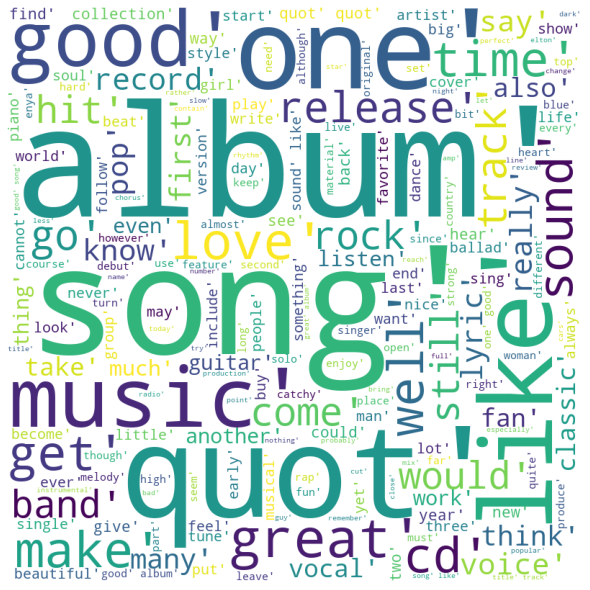

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(user_voc)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 